<a href="https://colab.research.google.com/github/deepakgupta1313/Moloco/blob/master/Moloco_Regression_Deepak_deepakgupta1313_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [0]:
data=pd.read_csv("Adops & Data Scientist Sample Data - Q2 Regression.csv", header=None);

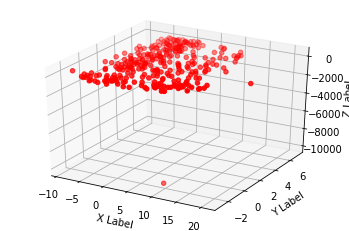

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

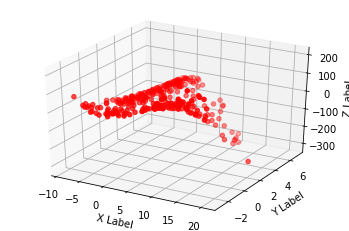

In [0]:
# Remove the outlier at the bottom

data_clean=data.loc[data[2]!=data[2].min()]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_clean[0], data_clean[1], data_clean[2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.view_init(0, 0)


plt.show()

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(data_clean[[0,1]])
#print(poly_variables.shape)
#print(poly_variables[:5])

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, data_clean[2], test_size = 0.3, random_state = 4)


Mean squared error: 0.098817
Variance score: 0.999981


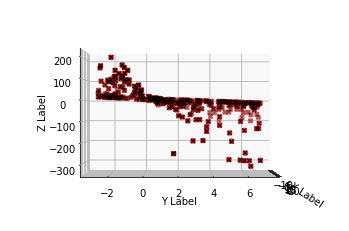

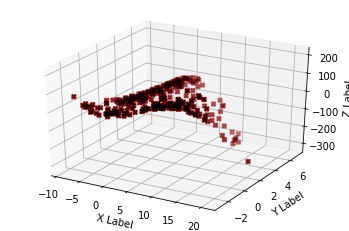

In [0]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    for i in range(num_iters):
      #alpha *= (1. / (1. + .9 * i))
      y_hat = np.dot(X, theta)
      #print(y_hat.shape)
      theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta
  
def predict(X, theta):
  return np.dot(X, theta)
 
X=np.array(poly_var_train);
Y=np.array(res_train);
Y = Y.reshape((Y.shape[0], 1))
#print(Y.shape)
init_theta=np.random.rand(10,1);
alpha=.000001;
theta=gradientDescent(X,Y,init_theta,alpha,100000000)




X=np.array(poly_variables);
Y=np.array(data_clean[2]);
Y = Y.reshape((Y.shape[0], 1))
all_preds=predict(X, theta);
print("Mean squared error: %f"
      % mean_squared_error(Y, all_preds))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(Y, all_preds))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_clean[0], data_clean[1], data_clean[2], c='red', marker='o')
ax.scatter(data_clean[0], data_clean[1], all_preds, c='black', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(0, 0)


plt.show()



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_clean[0], data_clean[1], data_clean[2], c='red', marker='o')
ax.scatter(data_clean[0], data_clean[1], all_preds, c='black', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()